Model with polynomial degree 1 | Epoch: 20/100 | Average Loss: 0.2075985
Model with polynomial degree 1 | Epoch: 40/100 | Average Loss: 0.2075985
Model with polynomial degree 1 | Epoch: 60/100 | Average Loss: 0.2075985
Model with polynomial degree 1 | Epoch: 80/100 | Average Loss: 0.2075985
Model with polynomial degree 1 | Epoch: 100/100 | Average Loss: 0.2075985
-----
Model with polynomial degree 2 | Epoch: 20/100 | Average Loss: 0.2019599
Model with polynomial degree 2 | Epoch: 40/100 | Average Loss: 0.2019600
Model with polynomial degree 2 | Epoch: 60/100 | Average Loss: 0.2019600
Model with polynomial degree 2 | Epoch: 80/100 | Average Loss: 0.2019600
Model with polynomial degree 2 | Epoch: 100/100 | Average Loss: 0.2019600
-----
Model with polynomial degree 3 | Epoch: 20/100 | Average Loss: 0.1455196
Model with polynomial degree 3 | Epoch: 40/100 | Average Loss: 0.1455043
Model with polynomial degree 3 | Epoch: 60/100 | Average Loss: 0.1455045
Model with polynomial degree 3 | Epoc

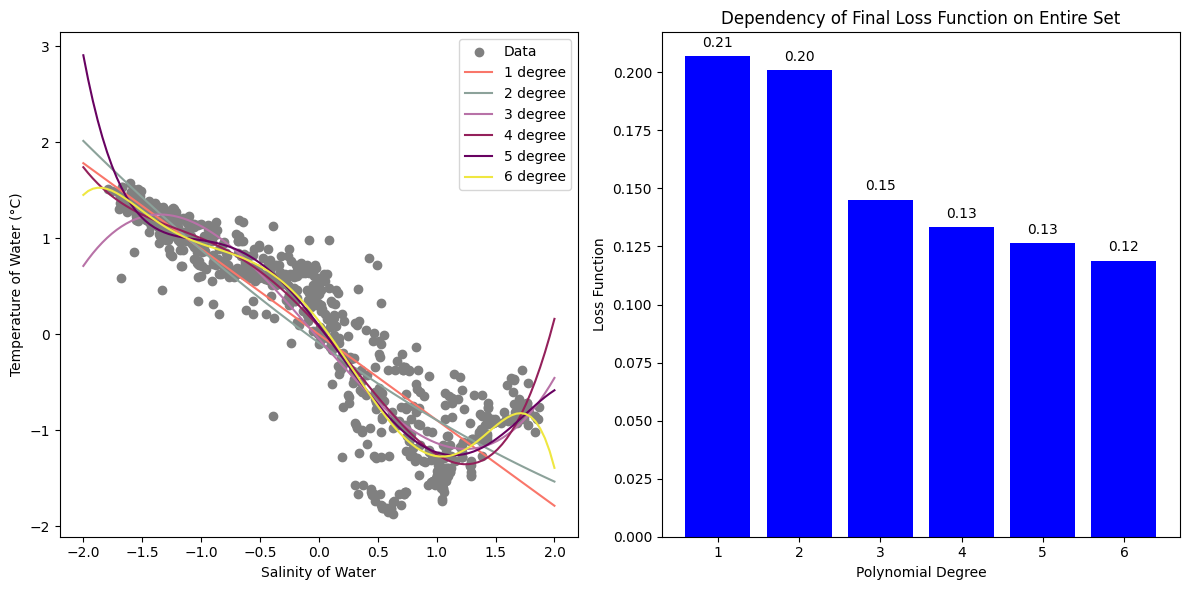

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import copy


class GradientDescentModel:

    w = None
    b = None

    def __init__(self, data, learning_rate, nb_features, nb_epochs, ping):
        self.nb_features = nb_features
        self.data = copy.deepcopy(training_data)
        self.data['x'] = GradientDescentModel.create_feature_matrix(data['x'], self.nb_features)
        self.learning_rate = learning_rate
        self.adam = tf.keras.optimizers.Adam(learning_rate=self.learning_rate)
        self.nb_epochs = nb_epochs
        self.ping = ping
        self.avg_loss = 0

    @staticmethod
    def create_feature_matrix(x, nb_features):
        tmp_features = []
        for deg in range(1, nb_features + 1):
            tmp_features.append(np.power(x, deg))

        return np.column_stack(tmp_features)

    def test_model(self, xs=np.linspace(-2, 2, 100, dtype='float32')):
        xs_features = GradientDescentModel.create_feature_matrix(xs, self.nb_features);
        return xs, self.pred(xs_features)

    def train_model(self):
        self.w = tf.Variable(tf.zeros(self.nb_features))
        self.b = tf.Variable(0.0)

        total_loss = 0
        samples_num = self.data['x'].shape[0]

        for epoch in range(self.nb_epochs):
            epoch_loss = 0

            for sample in range(samples_num):
                x = self.data['x'][sample].reshape((1, self.nb_features))
                y = self.data['y'][sample]

                curr_loss = self.train_step(x, y)
                epoch_loss += curr_loss

            epoch_loss /= samples_num
            total_loss += epoch_loss

            if (epoch + 1) % self.ping == 0:
                print(f'Model with polynomial degree {self.nb_features} | Epoch: {epoch + 1}/{self.nb_epochs} | Average Loss: {epoch_loss:.7f}')

        self.avg_loss = total_loss / nb_epochs

        return

    def train_step(self, x, y):
        w_grad, b_grad, loss = self.calc_grad(x, y)

        self.adam.apply_gradients(zip([w_grad, b_grad], [self.w, self.b]))

        return loss

    def calc_grad(self, x, y):
        with tf.GradientTape() as tape:
            loss_val = self.loss(x, y)

        w_grad, b_grad = tape.gradient(loss_val, [self.w, self.b])

        return w_grad, b_grad, loss_val

    def pred(self, x):
        w_col = tf.reshape(self.w, (self.nb_features, 1))
        hyp = tf.add(tf.matmul(x, w_col), self.b)

        return hyp

    def loss(self, x, y):
        prediction = self.pred(x)

        y_col = tf.reshape(y, (-1, 1))

        return tf.reduce_mean(tf.square(prediction - y_col))

# --------------------------------------------------------- #
tadija_path = '/content/drive/MyDrive/ML2024_D1/bottle.csv'
mina_path = '/content/drive/MyDrive/6003 ML/data/bottle.csv'
# --------------------------------------------------------- #

training_data = dict()
nb_features = 6
load_rows = 800
samples_num = 700

training_data['x'], training_data['y'] = np.genfromtxt(tadija_path, dtype='float32', delimiter=',',
                                                       skip_header=1, usecols=(5, 6), unpack=True, max_rows=load_rows)

mask = np.isnan(training_data['x']) | np.isnan(training_data['y'])

filtered_x = training_data['x'][~mask]
filtered_y = training_data['y'][~mask]

training_data['x'] = filtered_x[:samples_num]
training_data['y'] = filtered_y[:samples_num]

# shuffling data
indices = np.random.permutation(samples_num)
training_data['x'] = training_data['x'][indices]
training_data['y'] = training_data['y'][indices]

# normalization
training_data['x'] = (training_data['x'] - np.mean(training_data['x'])) / np.std(training_data['x'])
training_data['y'] = (training_data['y'] - np.mean(training_data['y'])) / np.std(training_data['y'])


nb_epochs = 100

losses = []

plt.figure(figsize=(12, 6))

# training data visualization
plt.subplot(1, 2, 1)
plt.scatter(training_data['x'], training_data['y'], color='gray', label='Data')
plt.xlabel("Salinity of Water")
plt.ylabel("Temperature of Water (°C)")

for i in range(1, nb_features + 1):
    model = GradientDescentModel(data=training_data, learning_rate=0.001, nb_features=i, nb_epochs=nb_epochs, ping=20)
    model.train_model()
    loss_val = model.loss(model.data['x'], model.data['y']).numpy()
    losses.append(loss_val)
    xs, ys = model.test_model()
    color = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(xs, ys.numpy().tolist(), color=color, label=str(model.nb_features) + ' degree')
    print('-----')

plt.legend()

# loss function depending on the polynomial degree
plt.subplot(1, 2, 2)
plt.bar(range(1, nb_features + 1), losses, color='b')
plt.xlabel('Polynomial Degree')
plt.ylabel('Loss Function')
plt.title('Dependency of Final Loss Function on Entire Set')
plt.xticks(range(1, nb_features + 1))

# annotating precise loss function values on top of each bar
for i, loss in enumerate(losses):
    plt.text(i + 1, loss + 0.02 * max(losses), f'{loss:.2f}', ha='center')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Na osnovu grafika mozemo primetiti underfitting modela na prvom i drugom stepenu polinoma, dok kako raste stepen polinoma funkcija troska je sve manja, na osnovu cega zakljucujemo da je model sve precizniji.

